### Data set description:
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival Survival (0 = No; 1 = Yes)

name Name

sex Sex

age Age

sibsp Number of Siblings/Spouses Aboard

parch Number of Parents/Children Aboard

ticket Ticket Number

fare Passenger Fare (British pound)

cabin Cabin

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Questions????
1.	What is the survival rate for males vs. females?
2.	Did passengers in higher classes (1st class) have a higher survival rate compared to lower classes (3rd class)?
3.	Did passengers with more family members (siblings/spouses or parents/children) aboard have a higher or lower chance of survival?
4.	Did the port of embarkation (C, Q, S) influence the survival rate?
5.	Did passengers who paid higher fares have a better chance of survival?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           5
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       886 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


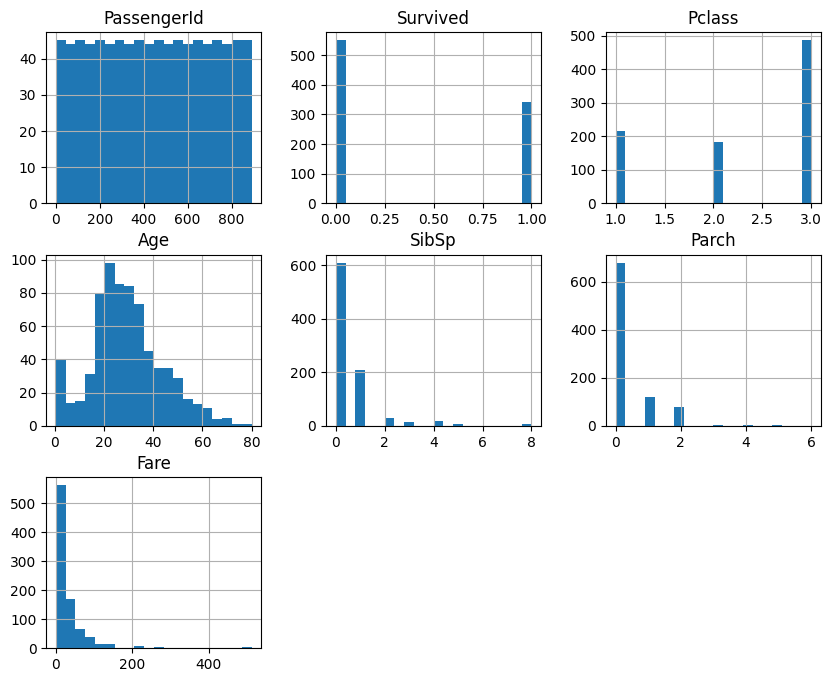

In [11]:
df.hist(bins=20, figsize=(10, 8))
plt.show()

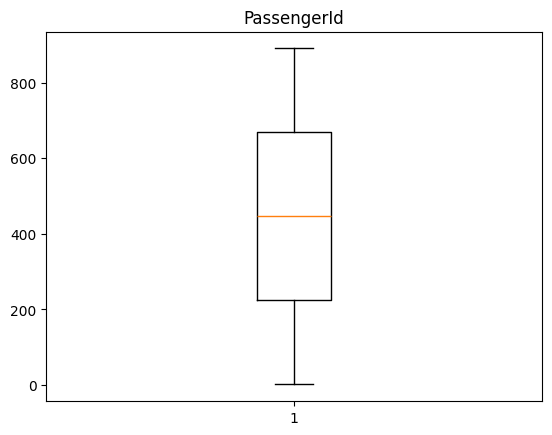

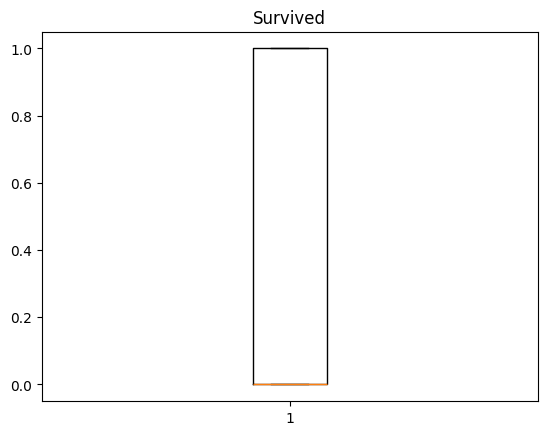

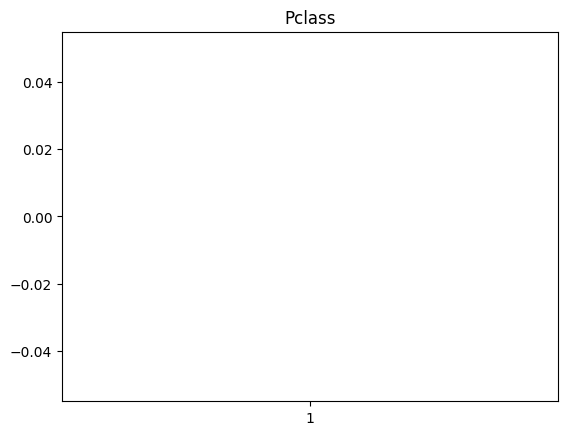

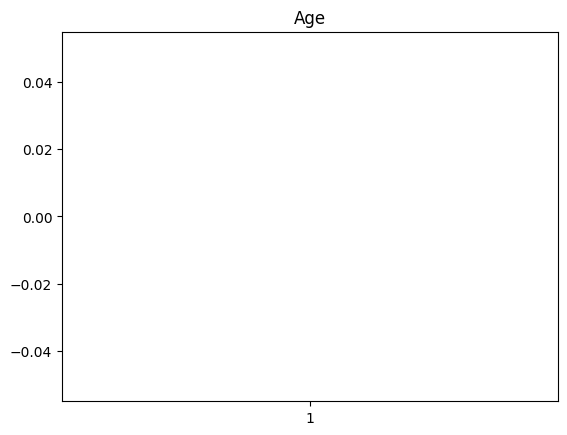

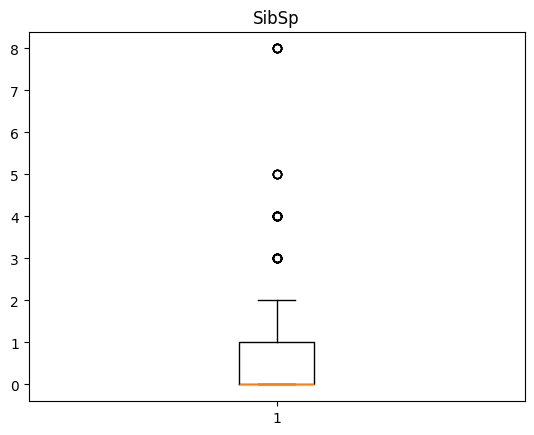

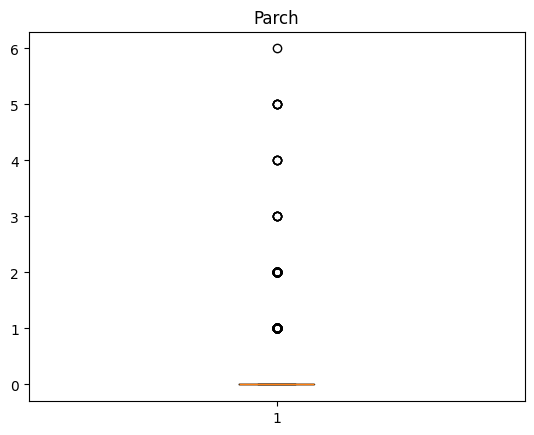

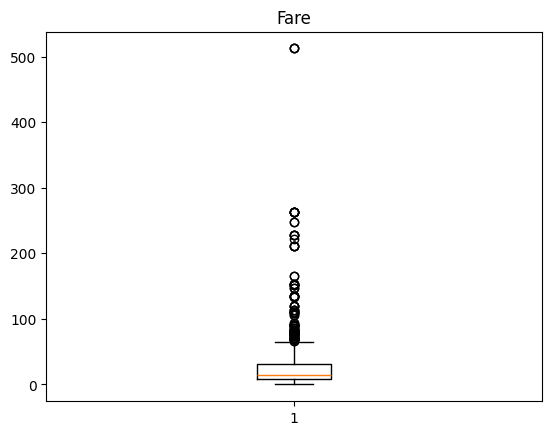

In [24]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,886.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.304740,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836809,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Need to check the minimum value of fare because it's 0 -> check those rows
- missing values:
    - Pclass           5 \*\*
    - Age            177
    - Cabin          687
    - Embarked         2 \*\*

- columns not needed for now - PassengerID, Ticket, Age, Cabin
- feature engineering: "family_members" = "SibSp" + "Parch"

- features to focus - Gender, Class, family members, Embarkation, fares

In [52]:
df["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [51]:
df["Embarked"] = df["Embarked"].fillna(value=df["Embarked"].mode())

In [49]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [55]:
df["Pclass"].value_counts(dropna=False)

Pclass
3.0    486
1.0    216
2.0    184
NaN      5
Name: count, dtype: int64

In [56]:
df[df["Pclass"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,13,0,NaN,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,NaN,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,NaN,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,NaN,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,NaN,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [ ]:
# plt.style. = "fivethirtyeight"

1.	What is the survival rate for males vs. females?

In [62]:
total_passenger = df["PassengerId"].count()

In [78]:
survived = df[df["Survived"] == 1]
male_surv_rate = survived[survived["Sex"] == "male"].count()[0] / total_passenger * 100
female_surv_rate = survived[survived["Sex"] == "female"].count()[0] / total_passenger * 100

C:\Users\alexi\AppData\Local\Temp\ipykernel_35404\3049897861.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_surv_rate = survived[survived["Sex"] == "male"].count()[0] / total_passenger * 100
C:\Users\alexi\AppData\Local\Temp\ipykernel_35404\3049897861.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_surv_rate = survived[survived["Sex"] == "female"].count()[0] / total_passenger * 100


In [80]:
print(f"Male Survival Rate: {round(male_surv_rate, 2)}%")
print(f"Female Survival Rate: {round(female_surv_rate, 2)}%")

Male Survival Rate: 12.23%
Female Survival Rate: 26.15%


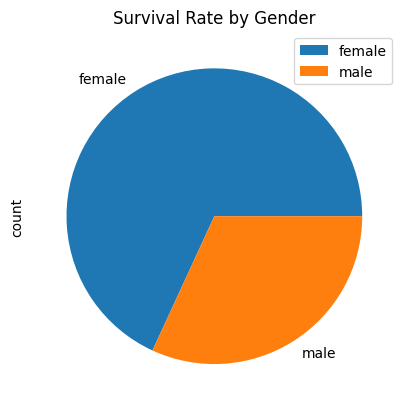

In [ ]:
survived["Sex"].value_counts().plot(
    kind="hist", 
    title="Survival Rate by Gender",  
    legend=True
    )
plt.show()

2.	Did passengers in higher classes (1st class) have a higher survival rate compared to lower classes (3rd class)?


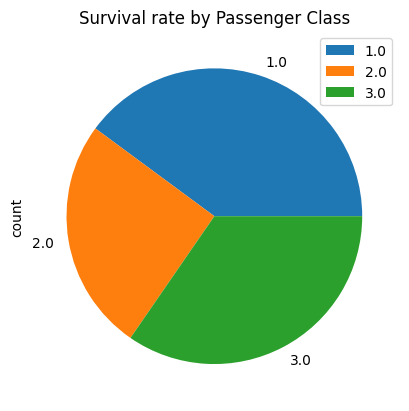

In [ ]:
df.loc[df["Survived"] ==1, "Pclass"].value_counts().sort_index().plot(
    kind="pie", 
    title="Survival rate by Passenger Class",
    legend=True
    )
plt.show()



3.	Did passengers with more family members (siblings/spouses or parents/children) aboard have a higher or lower chance of survival?

In [123]:
df["family_members"] = df["Parch"] + df["SibSp"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [124]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
886,887,0,2.0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,1.0,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,3
889,890,1,1.0,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0
890,891,0,3.0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


<Axes: ylabel='Frequency'>

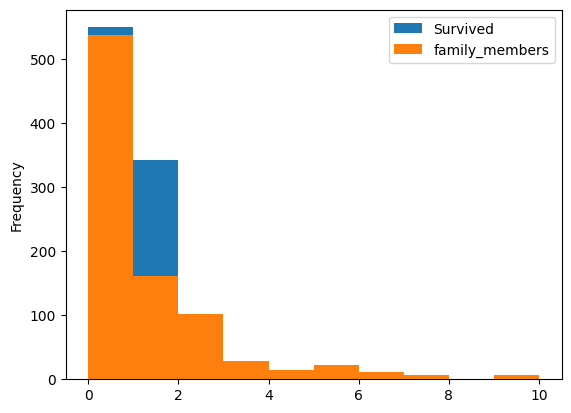

In [167]:
df[["Survived", "family_members"]].plot(kind="hist")

In [161]:
df.loc[df["Survived"] == 0, "family_members"].value_counts().sort_index()

family_members
0     374
1      72
2      43
3       8
4      12
5      19
6       8
7       6
10      7
Name: count, dtype: int64

In [162]:
df.loc[df["Survived"] == 1, "family_members"].value_counts().sort_index()

family_members
0    163
1     89
2     59
3     21
4      3
5      3
6      4
Name: count, dtype: int64

4.	Did the port of embarkation (C, Q, S) influence the survival rate?


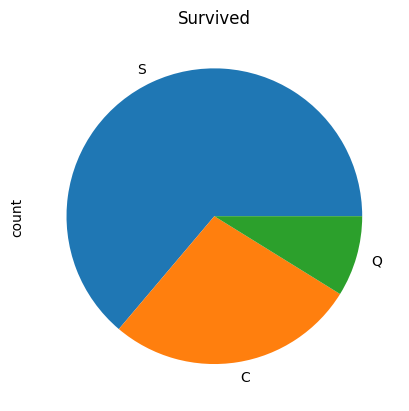

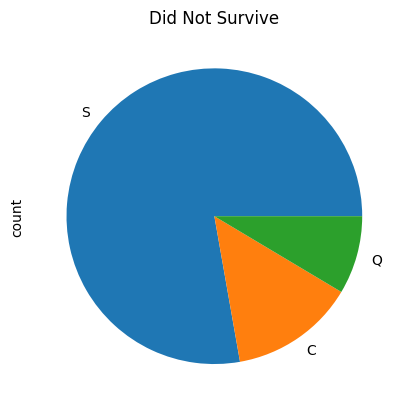

In [ ]:
df.loc[df["Survived"] == 1, "Embarked"].value_counts().plot(
    kind="pie",
    title="Survived"
)
plt.show()

df.loc[df["Survived"] == 0, "Embarked"].value_counts().plot(
    kind="pie",
    title="Did Not Survive"
)
plt.show()

5.	Did passengers who paid higher fares have a better chance of survival?

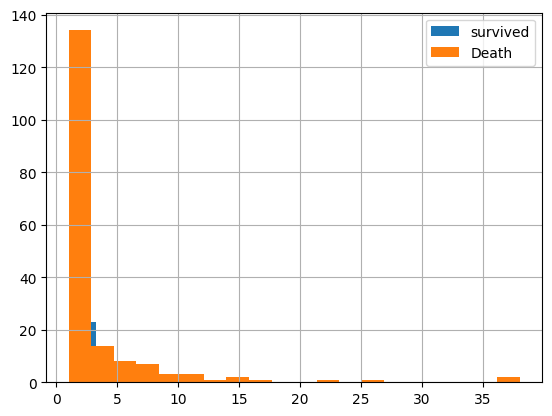

In [178]:
df.loc[df["Survived"] == 1, "Fare"].value_counts().hist(bins=20, label="survived")
df.loc[df["Survived"] == 0, "Fare"].value_counts().hist(bins=20, label="Death")
plt.legend()
plt.show()